## Part 2 - Decision Tree Classifier

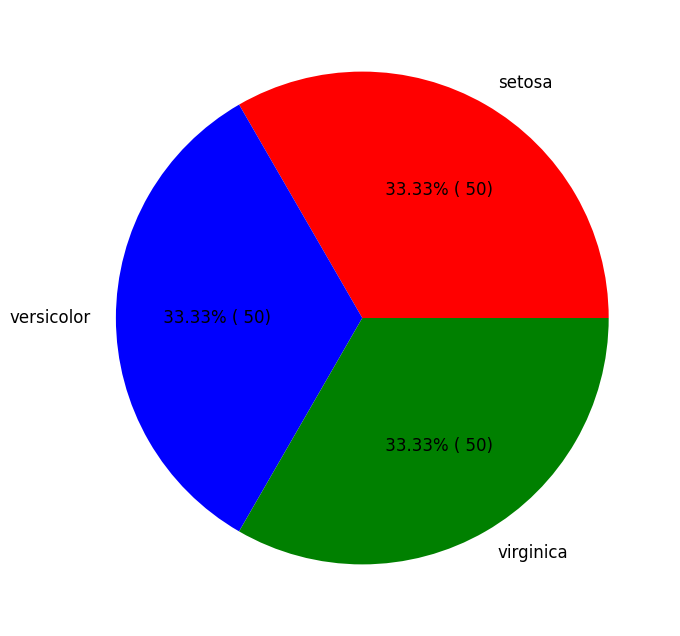

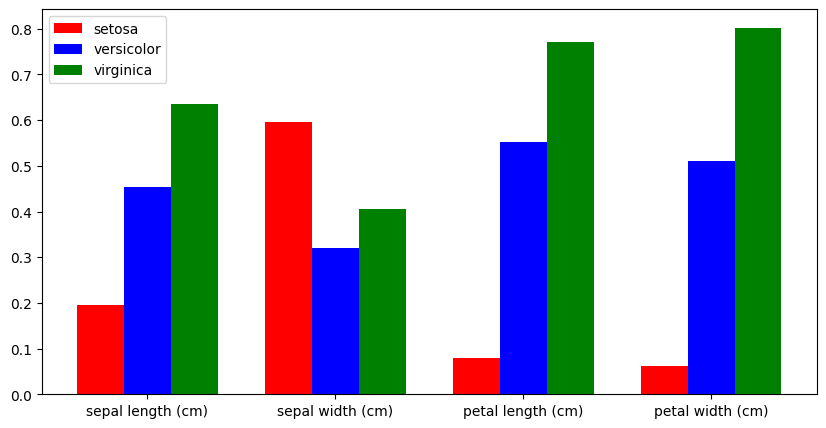

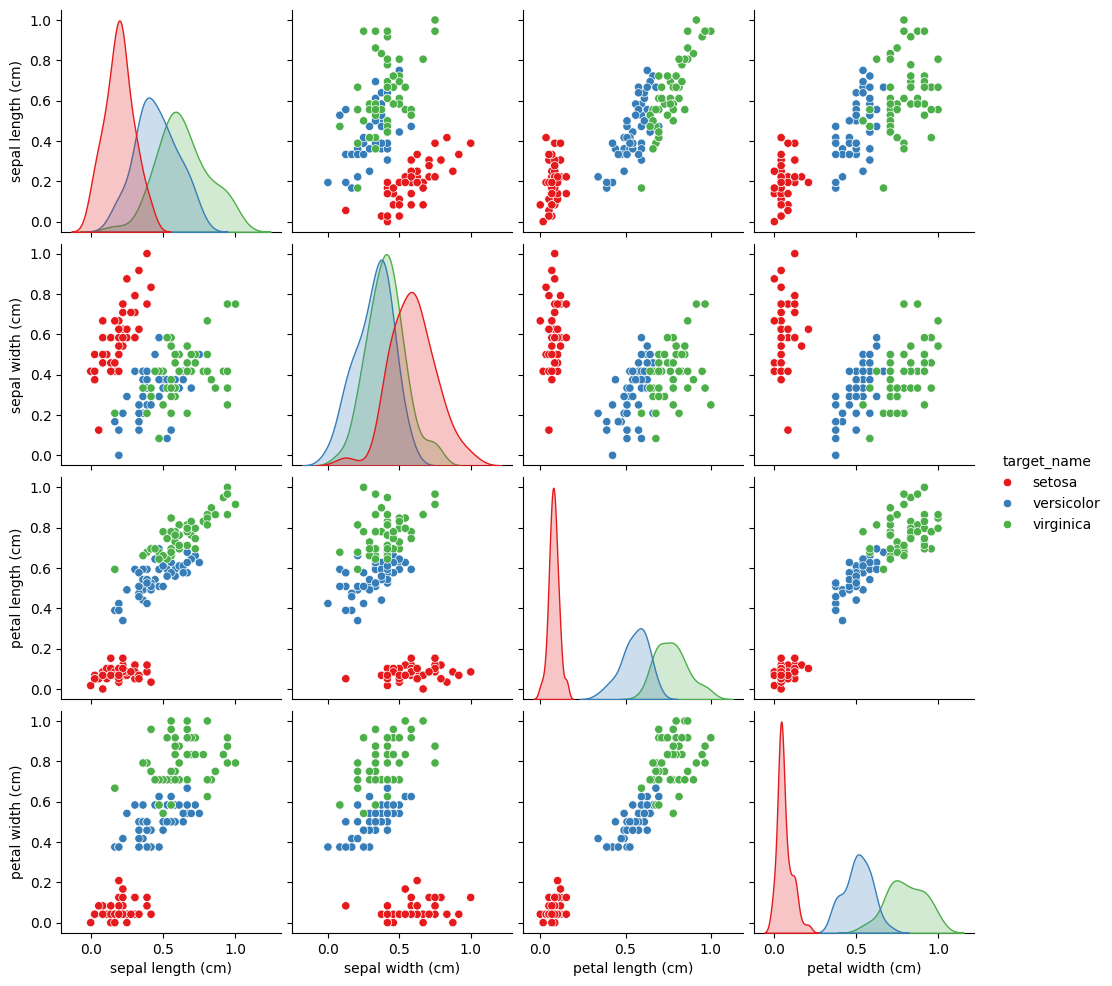

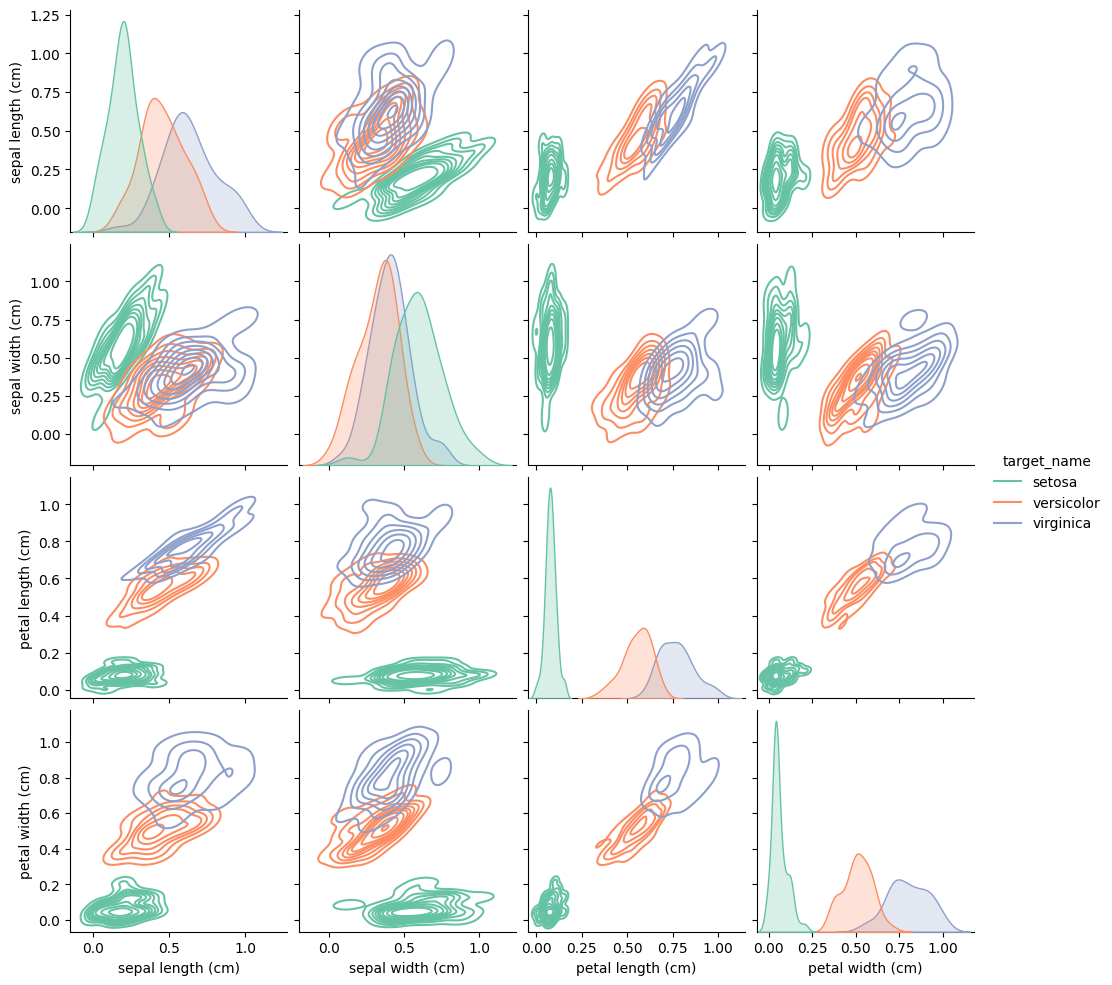

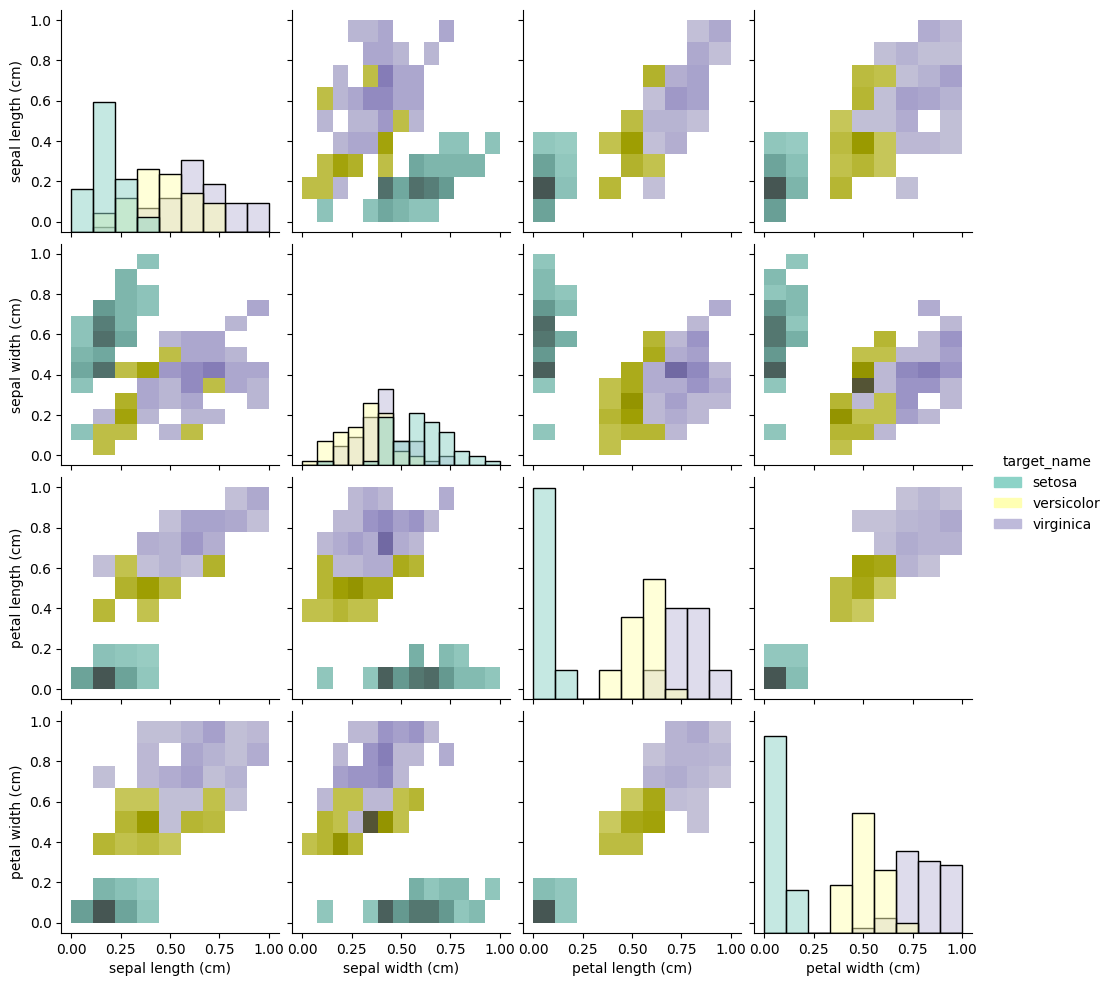

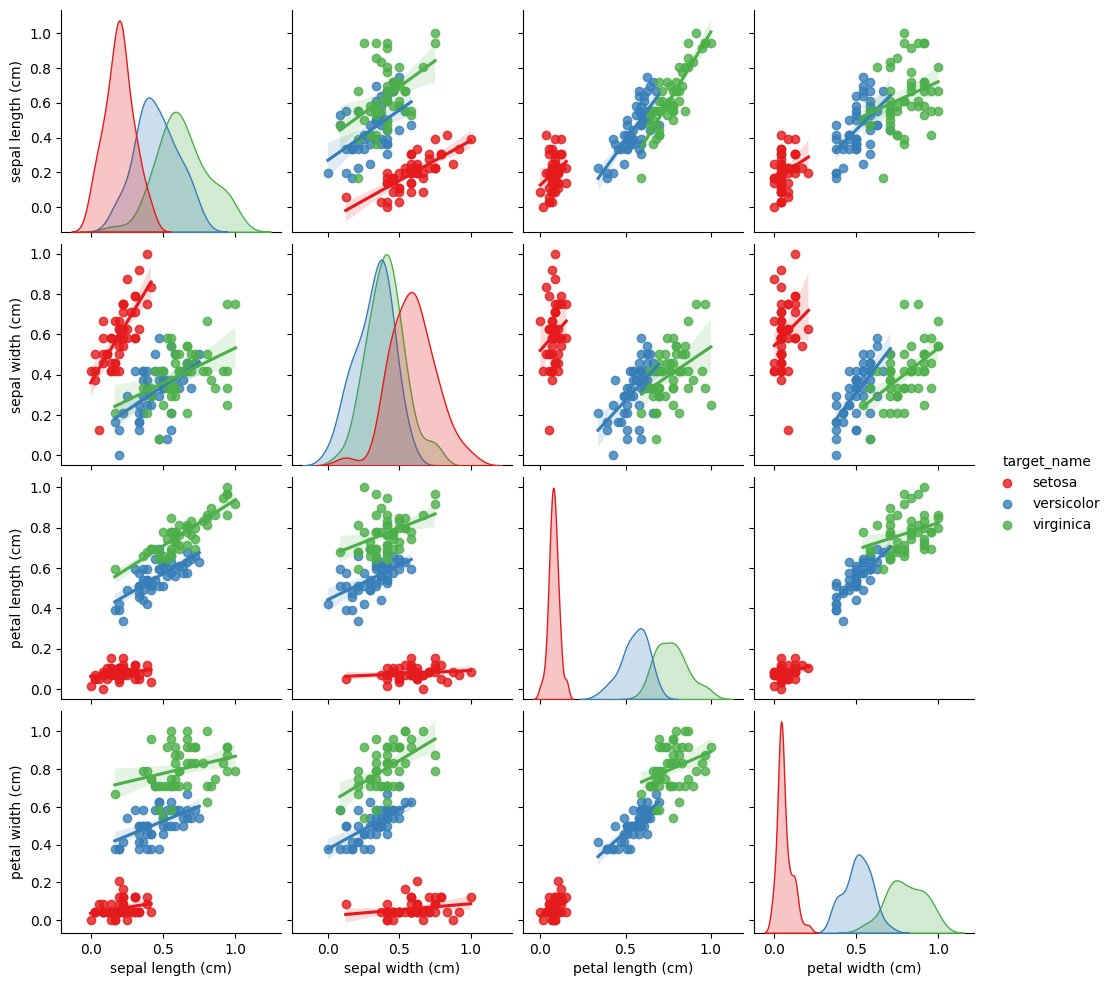

In [25]:
# Run Part 1 to import all variables
%run "./iris-flower1-data-analysis-and-exploration.ipynb"

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

### Prepare the x and y values

In [27]:
# x will be used as input (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)),
# y will be output (target)

# Select all rows, columns up until the fourth column (sepal length (cm), sepal width (cm), petal length (cm), petal width (cm))
X = scaled_df.values[:, :4].astype(np.float32) # Make sure that the type is float32
# Select all rows and only the fifth column (target)
y = scaled_df.values[:, 4].astype(int) # Make sure that the type is int

### Do the train test split

In [28]:
# Define the test set to be 20 % (the train set will be 80 %)
# Fix the split randomness with random_state = 1 (omit if you want it to be random)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

# There'll be 120 training points and 30 testing points
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


### Build the classifier

In [29]:
# Create the classifier
clf = DecisionTreeClassifier(random_state = 1)
# Train the classifier and then score it with the test set
clf.fit(X_train, y_train).score(X_test, y_test)

0.9666666666666667

### Randomized search predictions and scoring

In [30]:
# We're now trying to find out what'd be the optimal solution (i.e. optimal set of parameters) for the training

# Set hyperparameters to fine-tune the decision tree
# criterion: instructions on how to split your nodes within the decision tree (trying with gini and entropy)
# splitter: how the nodes are going to be split (trying with best and random)
# max_depth: how deep the tree is, i.e., how far it'll go with all of its nodes (trying with integers 5, 10, 15, etc., all the way up to 90)
# min_samples_split: minimum number of samples to split (trying with integers 2, 3, 4, etc., up to 10)
# max_features: maximum number of features that we're going to be looking at within the trees (trying with auto, square root, and base-2 logarithm)
params = {"criterion": ["gini", "entropy"],
          "splitter": ["best", "random"],
          "max_depth": np.linspace(5, 90, 18).astype(np.int32),
          "min_samples_split": np.arange(2, 10),
          "max_features": ["auto", "sqrt", "log2"]}

# Use the randomized search
# It'll randomly take a selection of the hyperparametes and try to find which ones that work out the best
# scoring = "accuracy" defines that the search will select the best parameters based on accuracy
# cv = 5 stands for 5-fold cross-validation
rand_search = RandomizedSearchCV(DecisionTreeClassifier(random_state = 1), params, scoring = "accuracy", random_state = 1, cv = 5)
# Train the search model
rand_search.fit(X_train, y_train)

# The most optimal parameters the model found
rand_params = rand_search.best_params_
# Print the optimal parameters the model found
print(rand_params, "\n")

# Print the best training accuracy, i.e., score the model found
print("Train accuracy:", rand_search.best_score_)
# Predict with the test data (will be iris species, 0, 1, or 2)
preds = rand_search.predict(X_test)
# Print the testing accuracy
print("Test accuracy:", accuracy_score(preds, y_test))

{'splitter': 'random', 'min_samples_split': np.int64(4), 'max_features': 'log2', 'max_depth': np.int32(85), 'criterion': 'entropy'} 

Train accuracy: 0.9666666666666668
Test accuracy: 0.9666666666666667


/Users/fosse/Desktop/python/classifications/classifications-venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fosse/Desktop/python/classifications/classifications-venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fosse/Desktop/python/classifications/classifications-venv/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._v

### Grid search predictions and scoring

In [31]:
# Opposed to randomized search,
# grid search will try out every single combination of hyperparameters it's given

# max_depth and min_samples_split were the only numeric parameters
# For those parameters, let's take the values the randomized search gave us,
# and make the parameters new ranges from 3 below to 3 over the values
# The other parameters shall have the values the randomized search came back with

# Define a new range for the tree max depth
max_depth = np.arange(rand_params["max_depth"] - 3, rand_params["max_depth"] + 3)
# Define a new range for the minimum number of samples to split
min_samples_split = np.arange(rand_params["min_samples_split"] - 3, rand_params["min_samples_split"] + 3)

# Use the criterion, splitter, and max_features values the randomized search ended up with
# max_depth and min_samples_split should always stay positive
params = {"criterion": [rand_params["criterion"]],
          "splitter": [rand_params["splitter"]],
          "max_depth": max_depth[max_depth >= 2],
          "min_samples_split": min_samples_split[min_samples_split >= 2],
          "max_features": [rand_params["max_features"]]}

# Note that this time GridSearchCV doesn't take random_state as a parameter
# (don't mix with DecisionTreeClassifier parameters),
# because grid search goes through every hyperparameter
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 1), params, scoring = "accuracy", cv = 5)
grid_search.fit(X_train, y_train)

grid_params = grid_search.best_params_
print(grid_params, "\n")

print("Train accuracy:", grid_search.best_score_)
preds = grid_search.predict(X_test)
print("Test accuracy:", accuracy_score(preds, y_test))

{'criterion': 'entropy', 'max_depth': np.int64(82), 'max_features': 'log2', 'min_samples_split': np.int64(4), 'splitter': 'random'} 

Train accuracy: 0.9666666666666668
Test accuracy: 0.9666666666666667


In [32]:
# How well the classification performed?
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        12
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

